
## 第一步：添加一个局部帧，形成一个新的环境。

想象一下，当一个函数开始工作时，它会给自己开辟一个全新的、干净的工作空间。这个工作空间就是“局部帧”，而这个局部帧连同它能访问到的其他（比如全局）数据构成了“新环境”。这个新环境保证了函数内部的操作不会意外地影响到函数外部的数据，同时也允许函数拥有自己独立的变量。 

### 局部帧
临时的、独立的数据存储区域，只在函数被调用的执行期间存在，并且里面的数据对外部是不可见的。除非通过返回值等机制。

### 环境
环境是指一个将名称（变量名、函数名等）映射到他们对应的值的集合。可以理解为保存了了多个映射表的集合。一个环境可以有父环境、形成一个环境链。当函数被调用时，它会创建一个新的环境，这个新的环境通常以当前调用的局部帧作为其顶层，这个新环境可能知道其“父环境”（即调用者所在的环境），以访问非局部变量。


## 第二步：在该帧中，将函数的形参绑定到实参.
即为 在这一步将函数外部提供的数据实参“喂给”函数内部的占位符“形参”，这个过程发生在函数自己的“工作空间”（局部帧）内部。

### 形参 formal parameters
在函数定义时，函数括号里声明的变量名，他是函数内部用于接受外部输入值的“占位符”

### 实参 arguments 
在函数调用时，实际传给函数的值，用于计算

### 绑定 bind
绑定意味着将形参与实参之间建立一种关联，具体来说就是将实参赋值给对应的形参在局部帧创建的存储位置。


## 第三步：在该新环境中执行函数体
一旦函数有了自己的独立工作空间（新环境），并且接受了必要的输入（实参绑定到了形参），它就可以开始执行它被设计来完成的任务了。所有的计算和操作都在这个独立的环境中进行，确保了隔离性和正确的变量作用域。

注意：每当一个函数被调用时，它通常都会创建一个自己的独立“工作空间”，这通常被称为“执行上下文”或包含“局部环境（local environment）”。

### 函数体 body of the function
这是函数定义中包含的实际执行的代码块。

### 执行
计算机按照代码的逻辑顺序一步步地运行函数体内的指令。

### 在该新环境中
这一步非常重要，这意味着函数体内部所有的操作（比如创建新的局部变量、访问参数，进行计算等）都会在这个刚刚建立的、包含了局部帧和参数绑定的新环境中进行。如果函数体内需要访问变量，它会首先在这个新环境中查找，如果查找不到，则会沿着环境链向上查找，例如，到调用它的那个函数的环境，或全局环境。

### 环境之间的关系
虽然每个函数调用都有其局部环境，但这些环境并不是完全孤立的，它们之间存在着明确的关系，通常形成一个环境链（Environment Chain）或作用域链（Scope Chain）。

#### 环境的类型
##### 全局环境
- 这是程序启动时创建的最顶层的环境。
- 在其中定义的变量和函数被称为“全局变量”和“全局函数”，它们在程序的整个生命周期内都可访问，并且通常是所有其他局部环境的“最终父环境”。
- 可以想象成整个办公室，所有人都可以访问一些公共资源（比如饮水机、打印机）。
##### 局部环境
- 每当一个函数被调用时创建的新环境。
- 这个环境包含了该函数的形参以及在函数体内部声明的所有局部变量。
- 它的生命周期通常只在函数执行期间。函数执行完毕后，这个局部环境通常会被销毁（除非存在闭包等特殊情况，后面会提到）。
- 这就像你的个人办公桌。
##### 父环境/封闭环境
- 每个局部环境都有一个指向其创建时所在的那个环境的引用，这个环境就是它的父环境或封闭环境。
- 当函数内部需要查找一个变量时，它会首先在自己的局部环境中查找。如果找不到，就会沿着环境链向上查找，直到找到该变量，或者查到全局环境仍然找不到，则会报错。
- 这就像你在自己的办公桌上找不到文件时，你会去问旁边的同事（父环境），或者去办公室的公共档案柜（全局环境）查找。
##### 环境链、作用域链（作用域规则）
- 通过父环境的引用，形成了从当前局部环境到全局环境的一系列嵌套环境，这就是环境链。

- 它定义了变量查找的顺序和规则，也就是“**作用域规则**”。

- 在绝大多数现代编程语言中，这种作用域规则是“词法作用域（Lexical Scoping）”或“静态作用域（Static Scoping）”。这意味着**一个函数可以访问的变量，是由它在代码中被定义的位置决定的，而不是由它在运行时被调用的位置决定的**。

#### 环境的关系：每个函数都存在各自的环境，这些环境之间为什么不会混乱？
还是回到上面的父环境和环境链的话题，每个函数在被定义时，都会“记住”自己被定义时所处的环境（他的父环境）这个父环境的引用是**函数自身的一部分**，即使函数在其他地方被调用，它依然会保持对这个父环境的引用。

严格的变量查找顺序：
当程序需要查找一个变量的值时，它会严格按照作用域链的顺序进行：

1. 首先在当前函数的局部环境中查找。
2. 如果找不到，则到当前函数的父环境中查找。
3. 如果还找不到，继续向上查找父环境的父环境，直到找到全局环境。
4. 如果遍历完整个作用域链仍然找不到，就会引发错误（如 NameError）。

**遮蔽--局部变量的优先级**

如果一个变量名在多个环境中都存在（例如，局部变量和全局变量同名），那么离当前环境最近的那个变量（即在作用域链上更靠前的那个）会优先被使用。这被称为“遮蔽”（Shadowing）。

**闭包的机制**



In [3]:
global_var = 10 # 全局环境

def outer_function(param_a): # outer_function被定义在全局环境
    outer_var = 20 # outer_function的局部环境

    def inner_function(param_b): # inner_function被定义在outer_function的局部环境
        inner_var = 30 # inner_function的局部环境
        print(global_var) # 访问全局变量
        print(outer_var) # 访问父环境（outer_function）的变量
        print(param_a) # 访问父环境（outer_function）的参数
        print(inner_var) # 访问自己的局部变量
        print(param_b) # 访问自己的参数

    return inner_function

# 调用
my_inner_func = outer_function(1)
my_inner_func(2)


## 在这个例子中：
## inner_function 的父环境是 outer_function 被定义时的那个局部环境。
## outer_function 的父环境是全局环境。
## 当 inner_function 尝试访问 outer_var 或 global_var 时，它会沿着这个环境链向上查找。

10
20
1
30
2


In [ ]:
def make_adder(n):
    def adder(x):
        return x + n # n 引用了外部函数的变量
    return adder
##上面是函数定义过程


add_five = make_adder(5)
print(add_five(0)) 

## 执行过程解读
### 等号先右后左：make_adder(5) 这一步执行了，函数make_adder,make_adder的函数体内定义了一个新的函数adder（x），请注意这里仅仅是定义了adder(x),并没有执行，就像写了一个菜谱，但是还没有烹饪。
### 然后是左边的赋值操作：make_adder(5)的返回对象adder被赋值给了变量 add_five,因此add_five现在指向的是那个具有“闭包”特性的adder函数，它记住了n 的值是5
### add_five（10）被调用，到了这一步，add_five 变量才真正作为一个函数来被调用，传入的实参是“10”，此时add_five内部的定义的返回的adder函数开始执行，他的参数x被定义为刚刚传入的实参“10”，它执行return x+n 即为 10+5 =15
### 所以add_five = make_adder(5) 这一步 

5


## 自定义函数
### 定义函数 def statement：一个新函数被创造了，在当前框架下一个一个函数被绑定了一个名字，但是注意并没有做任何实际的运算和评估
def squre(x):
    return x * x
- def 关键字用于定义函数,并将函数名与函数体关联起来。
- 函数名后面跟着括号，括号内可以包含形参。
- 函数体用缩进表示，包含实际的代码逻辑。

### 调用表达式 call expression：当遇到调用表达式时，对行参的评估后的真实值叫实参，然后对实参调用函数来评估它
eg: squre(2+2)
- 使用函数名后跟括号来调用函数。
- operator 指函数具体运算过程，表示一个算子
- operands 是一个可变参数列表，指我们在调用函数时括号内传入的参数，有时传入的操作数需要运算（评估：比如2+2），最终使用的参数叫做augment（2+2=4）

### 调用函数的过程 calling/applying a function：
- 首先，Python 解释器会创建一个新的局部帧（local frame），这个局部帧是函数调用的上下文。
- 然后，将形式参数绑定到实际参数上，这个过程称为“参数绑定”。
- 接下来，函数体内的代码会在这个新的局部帧中执行。
- 函数执行完毕后，局部帧会被销毁，返回值会传递给调用者。
- 如果函数没有返回值，则默认返回 None。
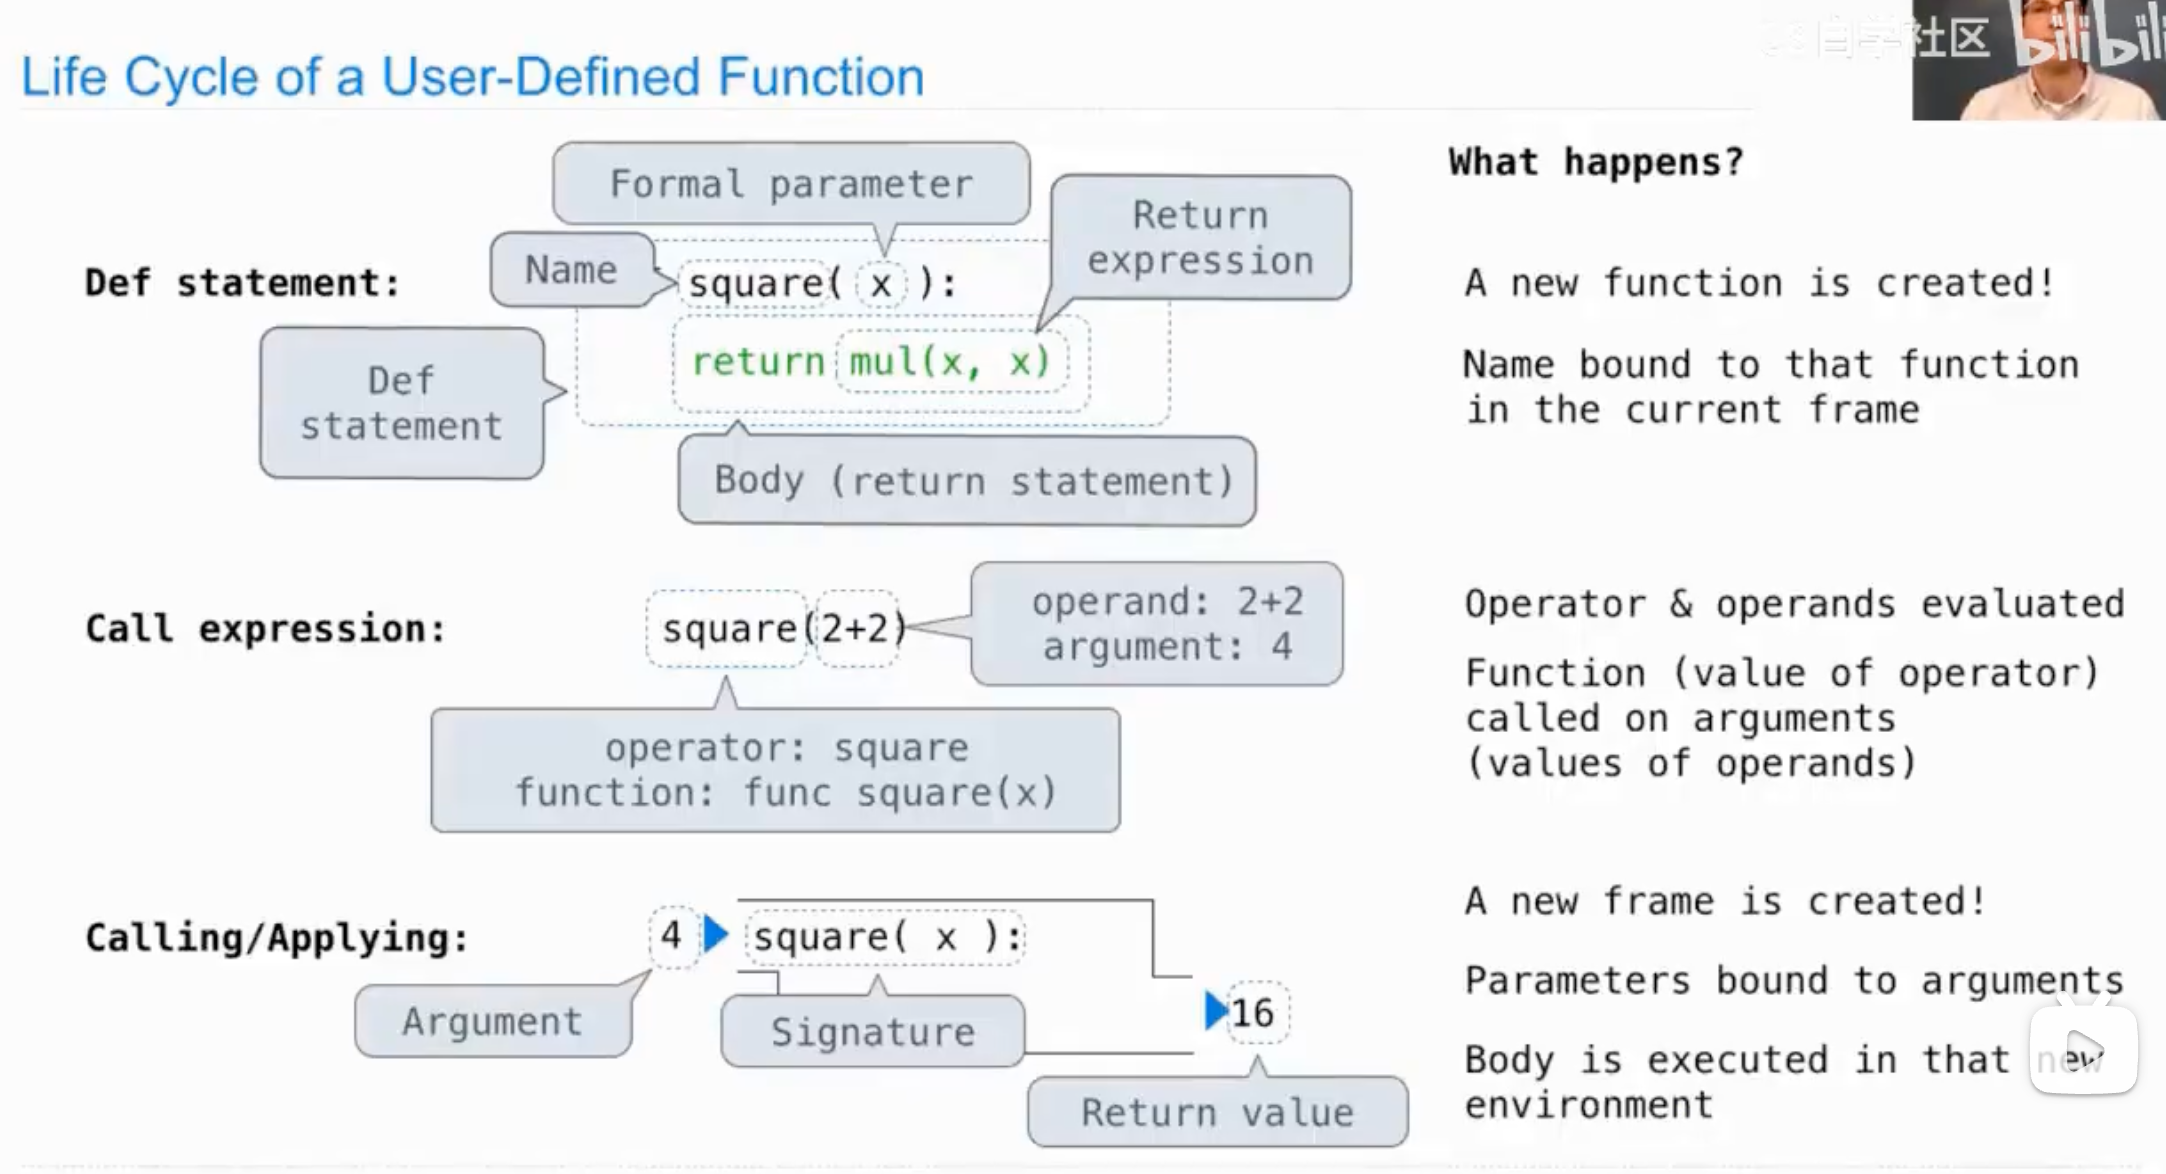

